In [206]:
!pip install koreanize-matplotlib

# 선형 회귀 모델을 이용한 자동차연비 (MPG) 예측

## 기본 라이브러리 import

In [207]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 데이터 준비하기

In [ ]:
df = pd.read_csv('/content/auto-mpg.csv', header = None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## 데이터 전처리

In [ ]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
# horsepower 칼럼의 ? 값 제거
# ? -> NaN -> dropna() 삭제 -> horsepower 칼럼 dtype를 float 변환

df['horsepower'].replace('?', np.nan, inplace = True)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [ ]:
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [ ]:
# 데이터타입 변경
df['horsepower'] = df['horsepower'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## 예측 모델 성능평가


*   feature 선택 3개 이상
*   훈련셋 (70%), 테스트셋(30%), random_state=7 고정
*   모델 선택(LinearRegression, Ridge, Lasso) 사용
*   모델의 정확도가 가장 높은 모델 선택 (alpha 조정 가능)
*   훈련셋과 테스트셋 결과 출력 (차트로 가능)

## LinearRegression 모델 사용

*   feature 3개 선택 -> horsepower, weight, cylinders   
*   예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차(mean squared error)를 최소화하는 파라미터 w와 b를 찾는 것





In [ ]:
# 학습에 필요한 feature 추출
df = df[['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin']]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
X = df[['cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin']]
y = df['mpg']

X.shape

(392, 7)

In [ ]:
from sklearn.linear_model import LinearRegression # 랜덤하게 잘라줌
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) # 70 : 30

In [ ]:
X_train.shape

(274, 7)

In [ ]:
X_test.shape

(118, 7)

In [ ]:
Ir = LinearRegression()

In [ ]:
Ir.fit(X_train, y_train) # 가중치, bias 계산 완료

LinearRegression()

In [ ]:
from __future__ import print_function
print('Ir.coef_ : ', Ir.coef_) # 가중치(w)
print('Ir.intercept_ : ', Ir.intercept_) # 절편 (b) , _는 다른 변수와 헷갈리지 않도록 모양을 주었음

Ir.coef_ :  [-0.69331972  0.01739275 -0.01411888 -0.00605481 -0.04467033  0.76933023
  1.57749904]
Ir.intercept_ :  -16.967851121893116


In [ ]:
# score() 메서드 -> 결정계수 R2(0-1)
# 훈련데이터, 테스트데이터의 차이를 확인 -> LinearRegression

print('훈련 데이터셋의 R2 : ', Ir.score(X_train, y_train))
print('테스트 데이터셋의 R2 : ', Ir.score(X_test, y_test))

훈련 데이터셋의 R2 :  0.8222086244764623
테스트 데이터셋의 R2 :  0.8119653015163926


## 릿지회귀 모델


*   규제를 통해서 과대적합되지 않기 위한 선형모델 -> l2 규제
*   모든 feature를 사용하되, 필요없는 feature는 가중치를 0과 가깝게 부여
*   feature 3개 선택 -> horsepower, weight, cylinders  

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # 규제를 품고 있음

In [ ]:
# score() 메서드 -> 결정계수 R2(0-1)
# 훈련데이터, 테스트데이터의 차이를 확인 -> Ridge
print('훈련 데이터셋의 R2 : ', ridge.score(X_train, y_train))
print('테스트 데이터셋의 R2 : ', ridge.score(X_test, y_test))

훈련 데이터셋의 R2 :  0.822206518247484
테스트 데이터셋의 R2 :  0.8121554347378483


In [ ]:
# alpha = 10 으로
ridge10 = Ridge(alpha=10).fit(X_train, y_train) # alpha = 1 규제를 기본값
print('훈련 데이터셋의 R2 : ', ridge10.score(X_train, y_train))
print('테스트 데이터셋의 R2 : ', ridge10.score(X_test, y_test))

훈련 데이터셋의 R2 :  0.822037894324191
테스트 데이터셋의 R2 :  0.8134746200261043


In [ ]:
# alpha = 0.01 으로
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train) # alpha = 1 규제를 기본값
print('훈련 데이터셋의 R2 : ', ridge001.score(X_train, y_train))
print('테스트 데이터셋의 R2 : ', ridge001.score(X_test, y_test))

훈련 데이터셋의 R2 :  0.8222086242605718
테스트 데이터셋의 R2 :  0.8119672547938834


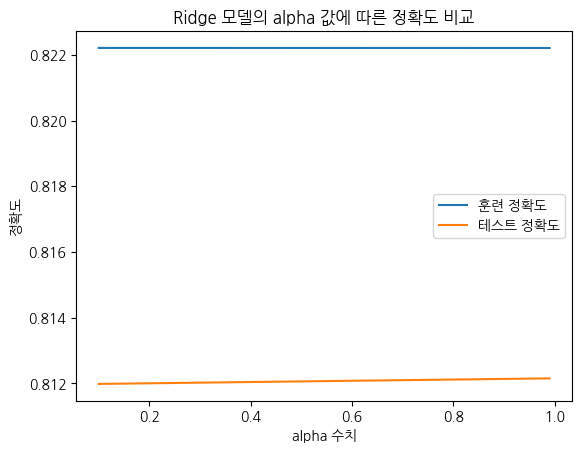

가장 높은 테스트 정확도: 0.8121535843451497, 해당 alpha 값: 0.9899999999999995


In [ ]:
import numpy as np

# alpha 값에 따른 정확도를 저장할 리스트 변수
train_scores = []
test_scores = []

# alpha 변수
n_alpha_settings = np.arange(0.1,1.0,0.01)

# 0~1까지 n_alpha 의 수를 증가시켜 학습 후 정확도 저장
for n_alpha in n_alpha_settings :
  # 모델 생성 및 학습
  ridge = Ridge(alpha= n_alpha)
  ridge.fit(X_train, y_train)

  # 훈련데이터셋 정확도 저장
  train_scores.append(ridge.score(X_train, y_train))

  # 데스트데이터셋 정확도 저장
  test_scores.append(ridge.score(X_test, y_test))

# 예측 정화도 비교 그래프 그리기
plt.figure(dpi=100)

plt.plot(n_alpha_settings, train_scores, label = '훈련 정확도')
plt.plot(n_alpha_settings, test_scores, label = '테스트 정확도')

plt.title('Ridge 모델의 alpha 값에 따른 정확도 비교')
plt.xlabel('alpha 수치')
plt.ylabel('정확도')
plt.legend()
plt.show()
# 가장 높은 테스트 정확도와 해당 alpha 값 출력
best_alpha = n_alpha_settings[np.argmax(test_scores)]
best_test_accuracy = max(test_scores)
print(f"가장 높은 테스트 정확도: {best_test_accuracy}, 해당 alpha 값: {best_alpha}")

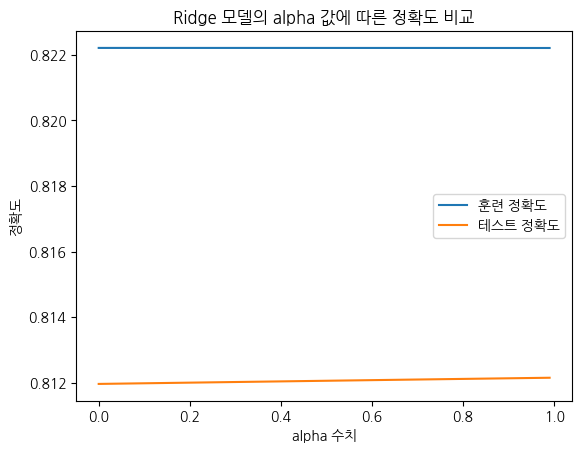

In [ ]:
import numpy as np

# alpha 값에 따른 정확도를 저장할 리스트 변수
train_scores = []
test_scores = []

# alpha 변수
n_alpha_settings = np.arange(0,1,0.01)

# 0~1까지 n_alpha 의 수를 증가시켜 학습 후 정확도 저장
for n_alpha in n_alpha_settings :
  # 모델 생성 및 학습
  ridge = Ridge(alpha= n_alpha)
  ridge.fit(X_train, y_train)

  # 훈련데이터셋 정확도 저장
  train_scores.append(ridge.score(X_train, y_train))

  # 데스트데이터셋 정확도 저장
  test_scores.append(ridge.score(X_test, y_test))

# 예측 정화도 비교 그래프 그리기
plt.figure(dpi=100)

plt.plot(n_alpha_settings, train_scores, label = '훈련 정확도')
plt.plot(n_alpha_settings, test_scores, label = '테스트 정확도')

plt.title('Ridge 모델의 alpha 값에 따른 정확도 비교')
plt.xlabel('alpha 수치')
plt.ylabel('정확도')
plt.legend()
plt.show()

## 라쏘 회귀모델


*   규제를 통해서 과대적합되지 않기 위한 선형모델 -> l1 규제
*   모든 feature를 사용하지않고, 필요없는 feature는 가중치 0 부여
*   feature 3개 선택 -> horsepower, weight, cylinders  

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) # alpha = 1 규제  기본값

In [ ]:
import numpy as np

# score() 메서드 -> 결정계수 R2(0-1)
# 훈련데이터, 테스트데이터의 차이를 확인 -> Lasso
print('훈련 데이터셋의 R2 : ', lasso.score(X_train, y_train))
print('테스트 데이터셋의 R2 : ', lasso.score(X_test, y_test))
print('학습에 사용한 특성 개수 : ', np.sum(lasso.coef_ != 0))

훈련 데이터셋의 R2 :  0.8050949247321858
테스트 데이터셋의 R2 :  0.8105884755066382
학습에 사용한 특성 개수 :  4


In [ ]:
print('lasso.coef_ : ', lasso.coef_) # 가중치(w)
print('lasso.intercept_ : ', lasso.intercept_) # 절편 (b) , _는 다른 변수와 헷갈리지 않도록 모양을 주었음

lasso.coef_ :  [-0.         -0.00154821  0.00152036 -0.00671533 -0.          0.68214202
  0.        ]
lasso.intercept_ :  -8.295973556140325


In [ ]:
lasso001 = Lasso(alpha=0.001).fit(X_train, y_train) # 모델 선택 -> 가장 좋
print('훈련 데이터셋의 R2 : ', lasso001.score(X_train, y_train))
print('테스트 데이터셋의 R2 : ', lasso001.score(X_test, y_test))
print('학습에 사용한 특성 개수 : ', np.sum(lasso001.coef_ != 0))

훈련 데이터셋의 R2 :  0.8222084731685912
테스트 데이터셋의 R2 :  0.8120349928427435
학습에 사용한 특성 개수 :  7


In [ ]:
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train) # alpha = 1 규제  기본값

print('훈련 데이터셋의 R2 : ', lasso01.score(X_train, y_train))
print('테스트 데이터셋의 R2 : ', lasso01.score(X_test, y_test))
print('학습에 사용한 특성 개수 : ', np.sum(lasso01.coef_ != 0))

훈련 데이터셋의 R2 :  0.8208506323120959
테스트 데이터셋의 R2 :  0.8159519204854978
학습에 사용한 특성 개수 :  6


In [205]:
# alpha 값에 따른 정확도를 저장할 리스트 변수
train_scores = []
test_scores = []

# alpha 변수
n_alpha_settings_2 = np.arange(0.1, 0.15, 0.00000001)

# 0~1까지 n_alpha 의 수를 증가시켜 학습 후 정확도 저장
for n_alpha_2 in n_alpha_settings_2:
    # 모델 생성 및 학습
    lasso = Lasso(alpha=n_alpha_2)
    lasso.fit(X_train, y_train)

    # 훈련데이터셋 정확도 저장
    train_scores.append(lasso.score(X_train, y_train))

    # 테스트데이터셋 정확도 저장
    test_scores.append(lasso.score(X_test, y_test))

# 예측 정확도 비교 그래프 그리기
plt.figure(dpi=100)

plt.plot(n_alpha_settings_2, train_scores, label='훈련 정확도')
plt.plot(n_alpha_settings_2, test_scores, label='테스트 정확도')

plt.title('Lasso 모델의 alpha 값에 따른 정확도 비교')
plt.xlabel('alpha 수치')
plt.ylabel('정확도')
plt.legend()
plt.show()

# 가장 높은 테스트 정확도와 해당 alpha 값 출력
best_alpha = n_alpha_settings_2[np.argmax(test_scores)]
best_test_accuracy = max(test_scores)
print(f"가장 높은 테스트 정확도: {best_test_accuracy}, 해당 alpha 값: {best_alpha}")


KeyboardInterrupt: ignored

feature 모두 다 해서 같은 방식으로 진행하